# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [40]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

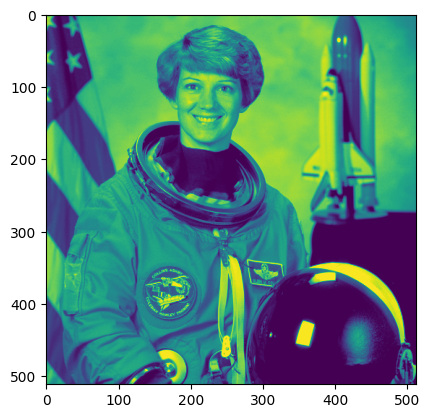

In [41]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [42]:
def meanfilter(imgmean, size):
    result = numpy.zeros(imgmean.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgmean.shape):
        if p[0]>=n and p[0]<imgmean.shape[0]-n and p[1]>=n and p[1]<imgmean.shape[1]-n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size,size):
                neighborhood_sum += imgmean[p[0]+q[0]-n, p[1]+q[1]-n]
            result[p] = neighborhood_sum / size**2
    return result
    

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

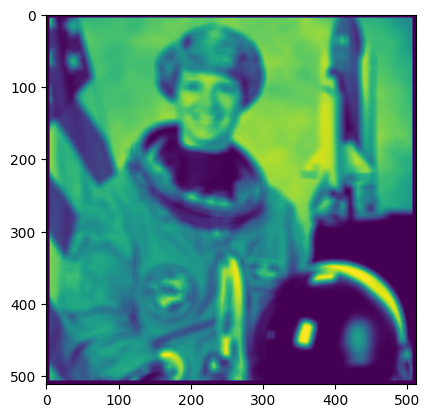

In [43]:
plt.imshow(meanfilter(img,11))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [44]:
astronaut_meanfilter5 = plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(meanfilter(img,5),astronaut_meanfilter5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [45]:
def medianfilter(imgmedian, size):
    result = numpy.zeros(imgmedian.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgmedian.shape):
        if p[0]>=n and p[0]<imgmedian.shape[0]-n and p[1]>=n and p[1]<imgmedian.shape[1]-n:
            imgmedian_list=list()
            for q in numpy.ndindex(size,size):
                imgmedian_list.append(img[p[0]+q[0]-n, p[1]+q[1]-n])
            imgmedian_list.sort()
            result[p]=imgmedian_list[len(imgmedian_list)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

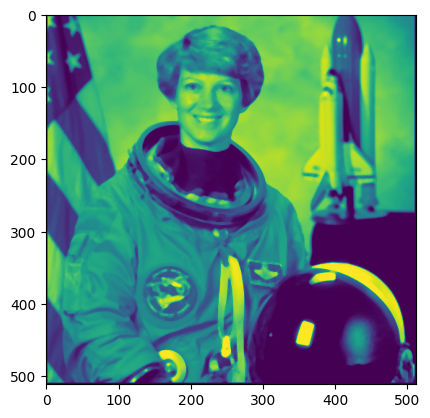

In [46]:
plt.imshow(medianfilter(img,5))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [47]:
astronaut_medianfilter5 = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(medianfilter(img,5),astronaut_medianfilter5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [48]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

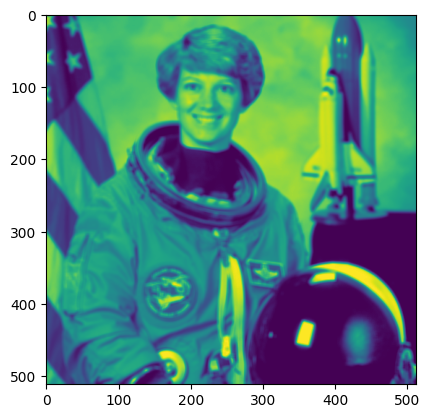

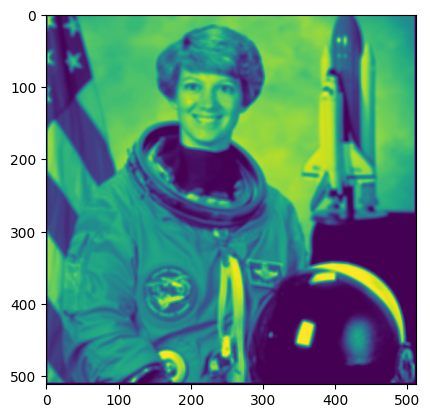

In [49]:
plt.figure()
plt.imshow(scipy.ndimage.uniform_filter(img, 5))
plt.figure()
plt.imshow(meanfilter(img,5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

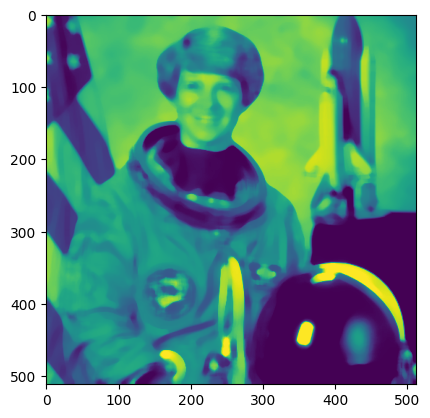

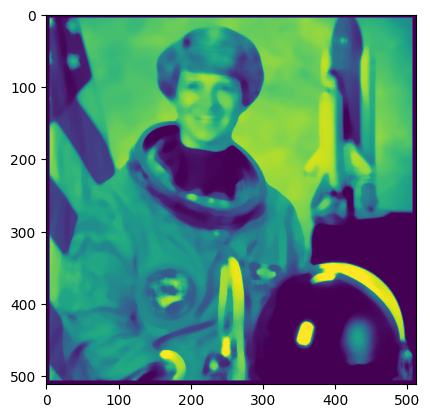

In [50]:
plt.figure()
plt.imshow(scipy.ndimage.median_filter(img, 11))
plt.figure()
plt.imshow(medianfilter(img,11))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

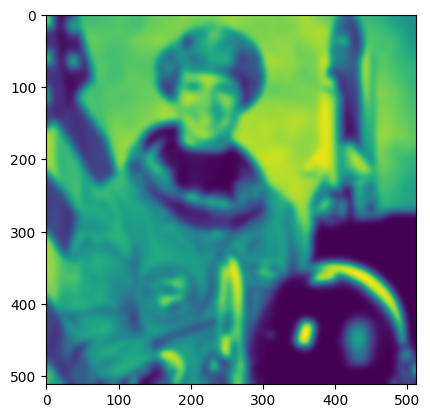

In [51]:
plt.imshow(scipy.ndimage.gaussian_filter(img, 5))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Bei unseren eigenen Funktionen entsteht ein schwarzer Rand, der umso größer wird, je größer die Filtermaske ist. scipy.ndimage. Pixel, bei denen die Filtermaske nicht in das Bild passt, setzen wir auf 0. scipy "erweitert" das Bild, damit jede Filtermaske in das erweiterte Bild passt.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [52]:
def fastmean(imgfast, size):
    result = numpy.zeros(imgfast.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgfast.shape):
        if p[0] in range(n, imgfast.shape[0]-n) and p[1] in range(n, imgfast.shape[1]-n):
            mask = imgfast[p[0]-n:p[0]+1+n, p[1]-n:p[1]+1+n]
            result[p]=mask.mean()
    return result

def fastmedian(imgfast, size):
    result = numpy.zeros(imgfast.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgfast.shape):
        if p[0] in range(n, imgfast.shape[0]-n) and p[1] in range(n, imgfast.shape[1]-n):
            fastmedian_list=list()
            filtermask = imgfast[p[0]-n:p[0]+1+n, p[1]-n:p[1]+1+n] #+1 weil [:] inklusiv für den Anfang aber exklusiv für das Ende ist
            fastmedian_list.extend(filtermask.flatten())
            fastmedian_list.sort()
            result[p]=fastmedian_list[len(fastmedian_list)//2]  #Muss man nicht noch +1 rechnen, weil // immer abrundet? assert sagt aber, dass es so passt
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

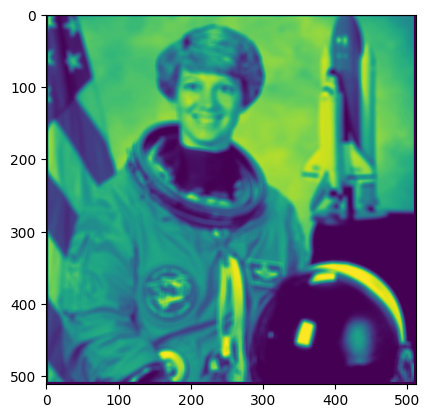

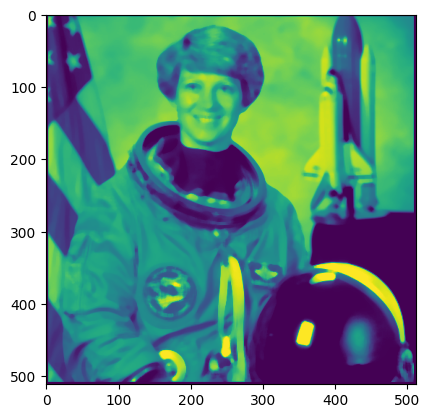

In [53]:
plt.figure()
plt.imshow(fastmean(img,7))
plt.figure()
plt.imshow(fastmedian(img,7))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

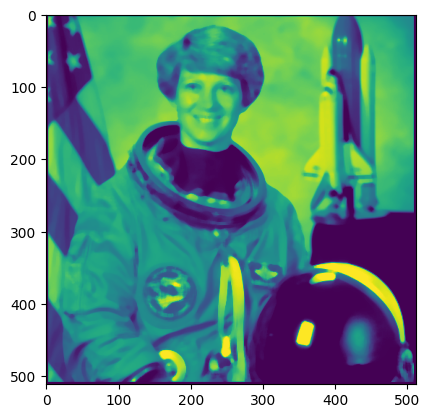

In [54]:
plt.figure()
plt.imshow(meanfilter(img,7))
plt.figure()
plt.imshow(medianfilter(img,7))

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [55]:
%timeit fastmean(img,5)
%timeit meanfilter(img,5)
%timeit fastmedian(img,5)
%timeit medianfilter(img,5)

2.27 s ± 64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.33 s ± 79.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.83 s ± 72.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.64 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

In [ ]:
fastmean: 2.27+-0,06 s
meanfilter: 8.33+-0,08 s
fastmedian: 1.83+-0,07 s
medianfilter: 7,64+-0,12s

Fastfilter ist schneller, weil die Pixel der Filtermaske nicht mehr einzeln ausgewählt werden, sondern in einem Schritt als slice behandelt werden